In [16]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
from torch import nn
from torchvision import transforms

ModuleNotFoundError: No module named 'torchvision'

############################################## 
		## Exercise 1 (Python) ## 
##############################################

In [4]:
#Here we process the given data and set k for our polyfit
filepath = 'C:\\Users\\Tanush\\Documents\\APM\\Repo\\APM598\\Assignment1\\data_HW1_ex1.csv'
data = np.loadtxt(filepath ,delimiter=',') 
x,y = data[:,0],data[:,1]
x_train, y_train = data[0:int(len(data)*0.8), 0], data[0:int(len(data)*0.8), 1]
x_test, y_test = data[int(len(data)*0.8):, 0], data[int(len(data)*0.8):, 1]
k = 12

In [6]:
def loss(degree, x, y):
    '''This function computes the loss'''
	return np.sum((np.polyval(np.polyfit(x, y, degree), x) - y)**2)

In [13]:
def ex1a():
	losses = list()
	for degree in range(0, k):
		losses.append(loss(degree, x, y))
	#plot loss against k (k = degree of polynomial)
	plt.figure('Ex. 1a - Loss function vs Poly Degree')
	plt.plot(range(0, k), losses, 'b-')
	plt.xlabel('Degree K')
	plt.ylabel('Loss')
	plt.show()

In [14]:
def ex1bc():
	train_error = list()
	test_error = list()

	for degree in range(0, k+1):
		train_error.append(loss(degree, x_train, y_train))
		#poly1d makes an object of the fitted polynomial 
		#and can be used to predict 
		#another way of predicting as compared to polyval
		poly_fit = np.poly1d(np.polyfit(x_train, y_train, degree))
		predict = poly_fit(x_test)
		test_error.append(np.sum((predict-y_test)**2))
	print('Degree   TrainError   TestError')
	for degree, (train_err, test_err) in enumerate(zip(train_error, test_error)):
		print('%-9i%-13.2f%.2f'%(degree, train_err, test_err))
	k_star = test_error.index(min(test_error))
	print('\nOrder k* = {} since it has the least test error\n'.format(k_star))
	coeffs = np.polyfit(x, y, k_star)
	print('\nCoeffs for k*(2): ', coeffs)

	#display test vs train loss
	fig = plt.figure('Ex. 1b - Test/Train Error vs Poly Degree', figsize=(12,5))
	ax1 = fig.add_subplot(1, 2, 1)
	train_line, = ax1.plot(range(0, k+1), train_error, c='b')
	test_line, = ax1.plot(range(0, k+1), test_error, c='r')
	ax1.set(xlabel="Degree K", ylabel="Error")
	ax1.legend([train_line, test_line], ["Train Loss", "Test Loss"])

	#display polyfit
	ax2 = fig.add_subplot(1, 2, 2)
	predict = np.poly1d(np.polyfit(x, y, k_star))
	ax2.plot(x, y, 'bo')
	x.sort()
	p_fit, = ax2.plot(x, predict(x), 'r-')
	ax2.set(xlabel="x", ylabel="y")
	ax2.legend([p_fit], ["K* = {}".format(k_star)])
	plt.show()


******* Exercise 1 ********



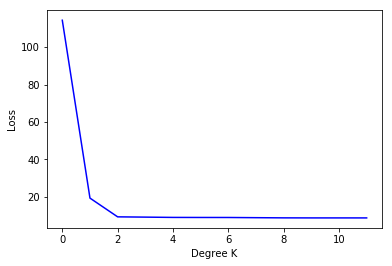

Degree   TrainError   TestError
0        81.00        33.51
1        15.10        4.45
2        7.97         1.24
3        7.72         1.40
4        7.57         1.43
5        7.49         1.51
6        7.48         1.50
7        7.42         1.38
8        7.38         1.34
9        7.37         1.34
10       7.37         1.32
11       7.33         10.07
12       7.27         25.26

Order k* = 2 since it has the least test error


Coeffs for k*(2):  [ 0.39284984 -0.38975863  0.82121564]


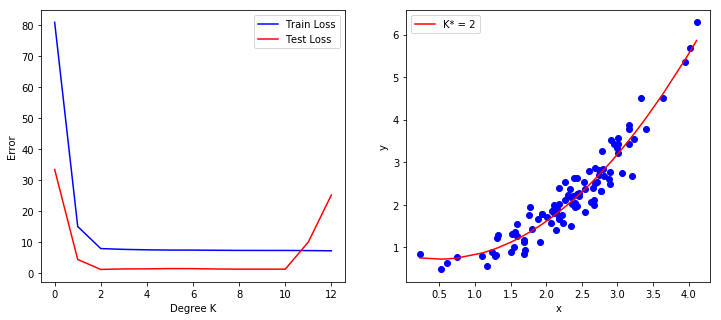

In [15]:
print('\n******* Exercise 1 ********\n')
ex1a()
ex1bc()


############################################## 
    ## Exercise 3 (Python) ## 
##############################################

In [17]:
#hyperparameters
n_epochs=40
learning_rate=0.0001
batch_size=4

training_set=datasets.FashionMNIST('data',train=True,download=True,transform=transforms.ToTensor())
testing_set=datasets.FashionMNIST('data',train=False,download=True,transform=transforms.ToTensor())
train_data=DataLoader(training_set,shuffle=True,batch_size=batch_size)
test_data=DataLoader(testing_set,shuffle=False,batch_size=batch_size)

NameError: name 'datasets' is not defined

In [18]:
#network
network=nn.Linear(28*28,10)
optimizer=torch.optim.Adam(network.parameters(),lr=learning_rate)
cal_loss=nn.CrossEntropyLoss()

NameError: name 'nn' is not defined

In [21]:
track_loss=[]
#training
for epoch in range(n_epochs):
  print ("epoch........."+str(epoch))
  running_loss=0
  minibatch=0
  for img,lbl in train_data:
    optimizer.zero_grad()
    N,_,h,w = img.size()
    score=network(img.view(N,h*w))
    loss=cal_loss(score,lbl)
    loss.backward()
    optimizer.step()
    running_loss += loss.detach().numpy()
    minibatch +=1
  avg_loss=running_loss/minibatch
  track_loss.append(avg_loss)
  print("average loss....." + str(avg_loss))

epoch.........0


NameError: name 'train_data' is not defined

In [22]:
#Plot training statistics
plt.plot([i for i in range(n_epochs) ],track_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()
weights = network.state_dict()['weight']
plt.clf()
    
for i in range(9):
  plt.figure()
  plt.imshow(weights[i].view(28,28),vmin=-0.5,vmax=0.5,cmap='seismic')
  
plt.colorbar(extend='both')

ValueError: x and y must have same first dimension, but have shapes (40,) and (0,)